# <b>Sales Analysis</b>

## Import necessary libraries

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Merging the files

In [2]:
joined_files = os.path.join("C:/Users/Yuvraj/Videos/Proj/Sales/Sales_Data", "Sales_*.csv")
  
# A list of all joined files is returned
joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop NAN rows

In [4]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
df.dropna(inplace = True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Get rid of text in order date column

In [7]:
df = df[df['Order Date'].str[0:2] != 'Or']

### Add Month Column

In [8]:
df['month'] = df['Order Date'].str[0:2]
df['month'] = df['month'].astype('int32')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


### Changing DataType for Quantity Ordered and Price Each

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

### Adding a sales column

In [10]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## Q1. What is the best month for sales? How much was earned that month?

In [11]:
monthly_sales = df.groupby('month').sum()
monthly_sales

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


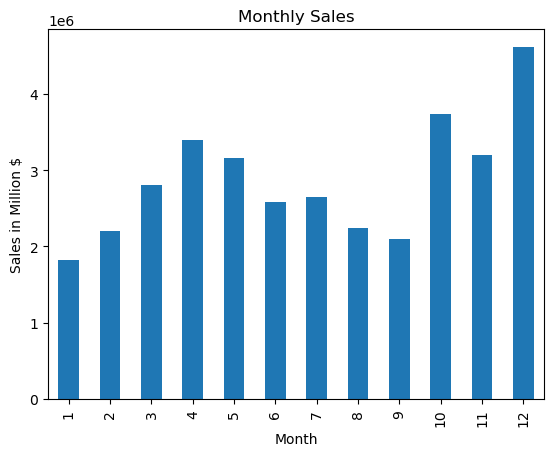

In [12]:
month_grouped = df.groupby('month').sum()['sales']

# create a bar chart
month_grouped.plot(kind='bar')

# add labels and title
plt.xlabel('Month')
plt.ylabel('Sales in Million $')
plt.title('Monthly Sales')

# show the chart
plt.show()

### Spliting the address to get the city names

In [13]:
df['city'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
df['state'] = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])
# display the result
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


## Q2. Which city sold the most product?

In [14]:
city_sales = df.groupby(['state','city']).sum()
city_sales

Quantity Ordered  Price Each   month       sales
state city                                                            
CA     Los Angeles               33289  5421435.23  208325  5452570.80
       San Francisco             50239  8211461.74  315520  8262203.91
GA     Atlanta                   16602  2779908.20  104794  2795498.58
MA     Boston                    22528  3637409.77  141112  3661642.01
ME     Portland                   2750   447189.25   17144   449758.27
NY     New York City             27932  4635370.83  175741  4664317.43
OR     Portland                  11303  1860558.22   70621  1870732.34
TX     Austin                    11153  1809873.61   69829  1819581.75
       Dallas                    16730  2752627.82  104620  2767975.40
WA     Seattle                   16553  2733296.01  104941  2747755.48

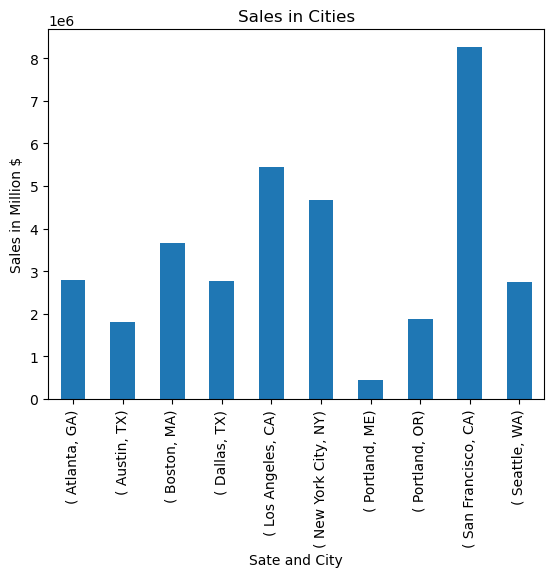

In [15]:
city_grouped = df.groupby(['city','state'])['sales'].sum()
city_grouped.plot(kind = 'bar')
plt.xlabel('Sate and City')
plt.ylabel('Sales in Million $')
plt.title('Sales in Cities')
plt.show()

### Converting Order date to date and time format

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


### Splitting Hours and Minutes

In [18]:
df['hour'] = df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


## Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

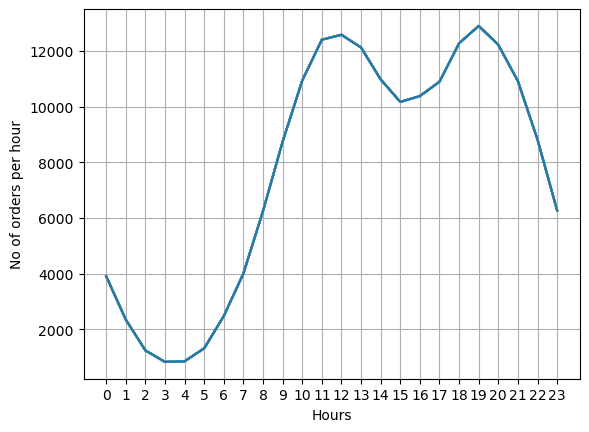

In [19]:
hours = [i for i, x in df.groupby('hour')]
cnt = df.groupby('hour').count()

plt.plot(hours, cnt)
plt.xticks(hours)
plt.grid()
plt.ylabel('No of orders per hour')
plt.xlabel('Hours')
plt.show()

In [20]:
df_dup = df[df['Order ID'].duplicated(keep = False)]
df_dup['group'] = df_dup.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df_dup = df_dup[['Order ID','group']].drop_duplicates()

C:\Users\Yuvraj\AppData\Local\Temp\ipykernel_23464\671145249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['group'] = df_dup.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


## Q4: What products are most often sold together?

In [21]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup['group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## What product sold the most? Why do you think it sold the most?

In [22]:
df_prod = df.groupby('Product').sum()['Quantity Ordered']
df_prod.sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

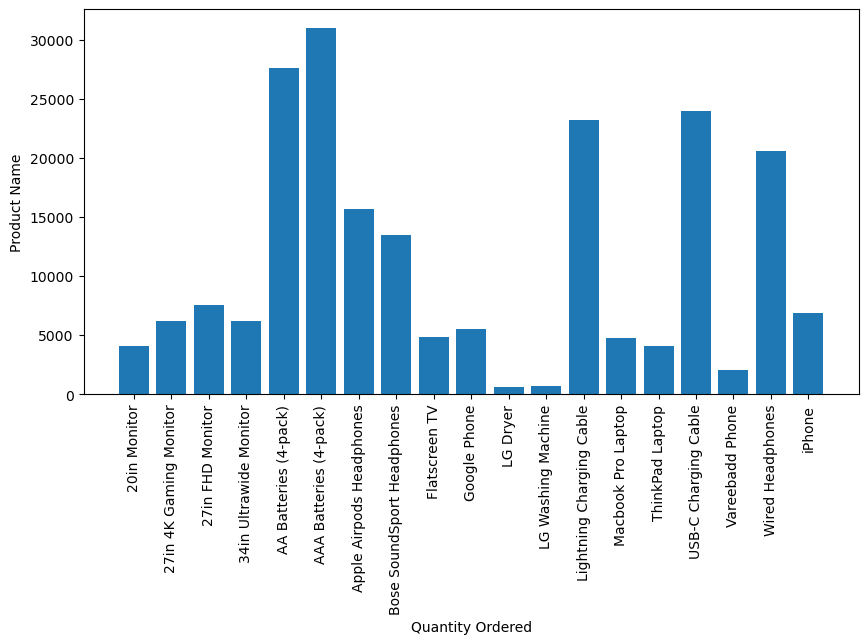

In [23]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

product = [prod for prod, df in product_group]
plt.figure(figsize=(10,5))
plt.bar(product, quantity_ordered)
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Name')
plt.xticks(rotation = 'vertical')
plt.show()

## Comparision between Product and Price

C:\Users\Yuvraj\AppData\Local\Temp\ipykernel_23464\1718885037.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation = 'vertical')


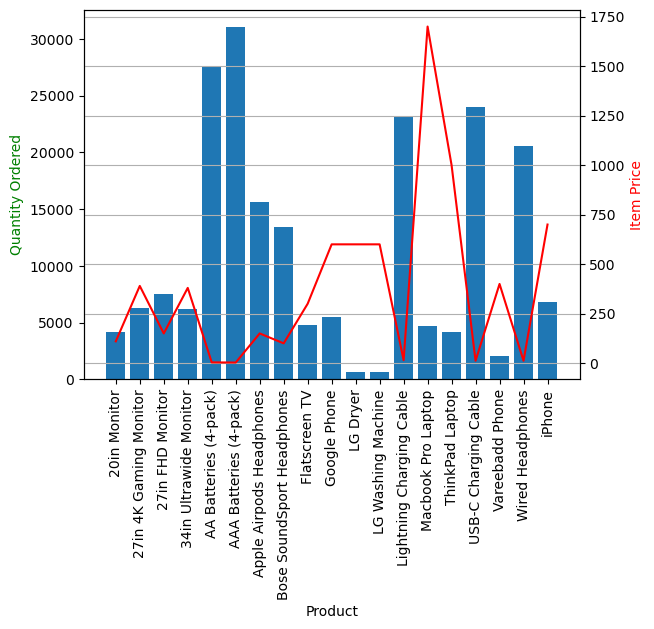

In [24]:
price = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered)
ax2.plot(product, price, 'r')
plt.grid()
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Item Price', color='r')
ax1.set_xticklabels(product, rotation = 'vertical')
plt.show()

## End